In [1]:
#Import library needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import seaborn as sn

from numpy import array
from sklearn.model_selection import train_test_split

from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
#Load dataset
data = pd.read_csv('dataset.csv', index_col=0)
data.head()

,Sentiment,Text Tweet
Id,,
1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
2,negative,Film king Arthur ini film paling jelek dari se...
3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
4,negative,Ane ga suka fast and furious..menurutku kok je...
5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


In [3]:
#Preprocessing

y = [0 if i=='negative' else 1 for i in data['Sentiment']]
x = data['Text Tweet']

In [4]:
#Spliting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies_test = np.asarray((unique, counts)).T

(unique, counts) = np.unique(y_train, return_counts=True)
frequencies_train = np.asarray((unique, counts)).T
print(frequencies_test)
print(frequencies_train)

[[ 0 27]
 [ 1 33]]
[[ 0 73]
 [ 1 67]]


In [6]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [7]:
#Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(x_train)
testing_sequences = tokenizer.texts_to_sequences(x_test)

#Padding
training_padded  = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(y_train)

testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dropout(0.05),
                             tf.keras.layers.Dense(1, activation='relu')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
num_epochs = 100
history=model.fit(training_padded, training_labels, batch_size=32, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/100
5/5 [==============================] - 1s 51ms/step - loss: 1.4627 - accuracy: 0.5214 - val_loss: 1.4758 - val_accuracy: 0.4500
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 1.2255 - accuracy: 0.5214 - val_loss: 1.2917 - val_accuracy: 0.4500
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0965 - accuracy: 0.5214 - val_loss: 1.1690 - val_accuracy: 0.4500
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0156 - accuracy: 0.5214 - val_loss: 1.0876 - val_accuracy: 0.4500
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.9424 - accuracy: 0.5214 - val_loss: 1.0201 - val_accuracy: 0.4500
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.9062 - accuracy: 0.5214 - val_loss: 0.9642 - val_accuracy: 0.4500
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.8511 - accuracy: 0.5214 - val_loss: 0.9188 - val_accuracy: 0.4500
Epoch 8/100
5/5 [========

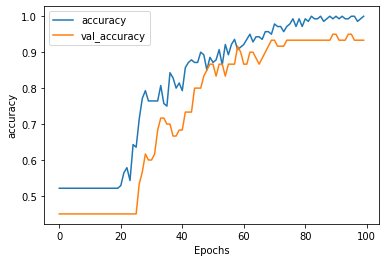

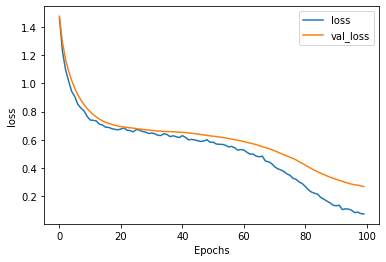

In [10]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [11]:
#test sentence

sentence = ['filmnya lucu banget, gua ngakak']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(np.rint(model.predict(padded)))

[[1.]]
